## CAPSTONE PROJECT MODULE 2

**LATAR BELAKANG**

Transjakarta adalah layanan bus rapid transit (BRT) yang beroperasi di Jakarta, Indonesia. Diluncurkan pada tahun 2004, Transjakarta bertujuan untuk menyediakan transportasi publik yang cepat, aman, dan nyaman bagi warga Jakarta. Layanan ini telah berkembang pesat dan menjadi salah satu komponen penting dalam sistem transportasi kota. Dalam upaya terus meningkatkan kualitas pelayanan, Transjakarta mengumpulkan berbagai data operasional seperti waktu tap-in dan tap-out penumpang, jenis kartu pembayaran yang digunakan, jenis kelamin penumpang, serta informasi terkait pemberhentian.

**PERNYATAAN MASALAH**

Analisis data ini sangat penting untuk memahami pola penggunaan, mengidentifikasi jam sibuk, dan mengevaluasi efektivitas sistem BRT. Melalui analisis ini, pihak manajemen Transjakarta dapat mengambil keputusan yang lebih tepat dalam perencanaan operasional, meningkatkan pengalaman pengguna, dan mengurangi waktu perjalanan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

Data Transjakarta ini memiliki beberapa kolom yang berisi informasi tentang transaksi kartu pada sistem Transjakarta. Data ini terdapat 14 kolom, berikut adalah beberapa kolom yang ada:

•	transID: ID transaksi 
•	payCardID: ID kartu pembayaran
•	payCardBank: Bank penerbit kartu pembayar
n
•	payCardName: Nama pemegang ka
r
tu
•	payCardSex: Jenis kelamin pemegang k
a
rtu
•	payCardBirthDate: Tanggal lahir pemegang 
k
artu
•	corridorID: ID k
o
ridor
•	corridorName: Nama 
k
oridor
•	direction: Arah pe
r
jalanan
•	tapInStops: ID tit
i
k tap in
•	tapInStopsName: Nama ti
t
ik tap in
•	tapInStopsLat: Latitude t
i
tik tap in
•	tapInStopsLon: Longitude t
itik tap in
•	stopStartSeq: Urutan 
titik tap in
•	tapInTime:
 Waktu tap in
•	tapOutStops: ID
 titik tap out
•	tapOutStopsName: Nam
a titik tap out
•	tapOutStopsLat: Latitu
de titik tap out
•	tapOutStopsLon: Longit
ude titik tap out
•	stopEndSeq: Ur
utan titik tap out
•	tapOut
Time: Waktu tap out
•	payAmouon: Durasi perjalanan




In [2]:
df = pd.read_csv('transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# Data Cleaning

Pada tahap ini adalah untuk membersihkan data dari anomali-anomali, seperti missing value, outliers dan data typo

In [3]:
print (f' Jumlah baris dalam data ini adalah {df.shape}')
df.info()

 Jumlah baris dalam data ini adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  objec

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Pada hasil cek missing value diatas terdapat beberapa kolom yg mempunyai misisng value, diantaranya corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime dan payAmount 
Data yang mempunyai missing value tersebut akan di hapus, karena jika data yang mempunyai missing value tersebut dihilangkan tidak akan terlalu berpengaruh dilihat dari total jumlah data yang ada

In [7]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [8]:
#cek missing value setiap kolom
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [9]:
#Display baris yang mempunyai missing value
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", rows_with_missing_values)

Rows with missing values:
               transID         payCardID payCardBank            payCardName  \
6      HEMW326B9N91TV   213155822653833      emoney  R. Devi Hariyah, S.T.   
7      XTKE052E5E87LN  3587341902618993         dki        Darmanto Rajasa   
11     IIEK980X1O23NZ   347204308990092      emoney  R.M. Labuh Laksmiwati   
21     ZJVI960B9I42DA   343851798729291      emoney           Garang Utama   
30     TCKQ601Q5O01BC  3589380857722689         dki  drg. Lukman Hidayanto   
...               ...               ...         ...                    ...   
37878  FFUS474T7Q54QF    36067042340502         bni         Jatmiko Mansur   
37882  YMCL988A7J02QF   180074952289665      emoney        Asmadi Setiawan   
37885  KUXY021D6I25YN    30169751274025         bni        Prasetya Wasita   
37887  UELP204M1S64QX  4068989702474318         dki         Ajimat Pradana   
37889  FSZU331F3O29PS     4300800810103      online         Faizah Samosir   

      payCardSex  payCardBirthDate c

In [10]:
#Display jumlah baris yg mempunyai missing values
num_rows_with_missing_values = rows_with_missing_values.shape[0]
print(f"Number of rows with missing values: {num_rows_with_missing_values}")

Number of rows with missing values: 6170


In [11]:
#Display spesifik yg mempunyai missing values
for column in df.columns:
    if df[column].isnull().any():
        print(f"Rows with missing values in {column} column:")
        print(df[df[column].isnull()])
        print()

Rows with missing values in corridorID column:
              transID            payCardID payCardBank  \
7      XTKE052E5E87LN     3587341902618993         dki   
120    MCWO805A6Q66MX     3570416613897992         dki   
240    PTDK452M9A71XF      342370004909630      emoney   
250    OLZA217B5B95DK  4371940047525876160      brizzi   
257    GHEY769K9T55WF        4281653494791      online   
...               ...                  ...         ...   
37689  ZVAU363K8Z72QF     4235440226938980         dki   
37727  MGBX067C2V69EZ      213145593134816      emoney   
37770  RGLG273G3M96TE  4725638979751926133      brizzi   
37797  HBLN935K0C66OQ        4667337468542      online   
37838  GTLM961T1U29JA     4204405669287580         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
7                Darmanto Rajasa          F              1991        NaN   
120         Gawati Damanik, S.E.          F              2010        NaN   
240        Kartika Habibi, S

In [12]:
df_cleaned = df.dropna()

In [13]:
# Check the shape of the cleaned dataframe
print("\nShape of the dataframe before cleaning:", df.shape)
print("Shape of the dataframe after cleaning:", df_cleaned.shape)


Shape of the dataframe before cleaning: (37900, 22)
Shape of the dataframe after cleaning: (31730, 22)


In [14]:
# Check for missing values in each column after cleaning
remaining_missing_values = df_cleaned.isnull().sum()
print("\nMissing values in each column after cleaning:")
print(remaining_missing_values)


Missing values in each column after cleaning:
transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64


In [15]:
df_cleaned.head() 

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [16]:
#Cek Duplikat data
df_cleaned.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37895    False
37896    False
37897    False
37898    False
37899    False
Length: 31730, dtype: bool

In [17]:
df_cleaned[df_cleaned.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


Tidak ada Data Duplikat

In [18]:
df_cleaned.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.173000e+04,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.000000,31730.00000
mean,4.206483e+17,1990.210337,0.500504,-6.214794,106.841787,13.609991,-6.214697,106.841563,21.301261,2721.68295
std,1.316424e+18,13.049288,0.500008,0.058456,0.061086,12.267099,0.059616,0.061802,13.891748,4249.99859
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.00000
25%,1.800443e+14,1982.000000,0.000000,-6.245863,106.801895,4.000000,-6.248460,106.800940,11.000000,0.00000
50%,3.507251e+15,1991.000000,1.000000,-6.214145,106.835200,10.000000,-6.214459,106.834892,18.000000,3500.00000
75%,4.684821e+15,2001.000000,1.000000,-6.174933,106.883630,19.000000,-6.174341,106.884940,30.000000,3500.00000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.00000


In [19]:
df['corridorName'].value_counts()

corridorName
Cibubur - Balai Kota                              391
Ciputat - CSW                                     383
Pulo Gadung - Monas                               343
Harmoni - Jakarta International Stadium           338
Kebayoran Lama - Tanah Abang                      333
                                                 ... 
Senen - Tanah Abang                                41
Gondangdia - Balai Kota                            40
Term. Pulo Gadung - Lampiri                        31
Tanah Abang - Kebayoran Lama via Pos Pengumben     23
Kampung Rambutan - Blok M                          17
Name: count, Length: 216, dtype: int64

In [20]:
df['tapOutStopsName'].value_counts()

tapOutStopsName
BKN                            316
Penjaringan                    265
Term. Senen                    196
Monas                          167
Term. Kampung Rambutan         164
                              ... 
Jln. Bima Kemanggisan            1
Jln. Gempol Raya                 1
Sbr. SMAN 10                     1
RSIA Brawijaya Jln. H. Jian      1
RSUD Cengkareng                  1
Name: count, Length: 2248, dtype: int64

In [21]:
df['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

In [22]:
df['tapOutTime'].value_counts()

tapOutTime
2023-04-10 19:10:15    3
2023-04-19 07:31:23    3
2023-04-07 19:44:04    3
2023-04-18 07:24:15    3
2023-04-17 18:14:19    3
                      ..
2023-04-03 19:48:19    1
2023-04-03 20:06:58    1
2023-04-03 23:21:50    1
2023-04-03 21:37:29    1
2023-04-12 21:34:53    1
Name: count, Length: 35908, dtype: int64

In [23]:
df['tapInTime'].value_counts()

tapInTime
2023-04-25 06:23:00    3
2023-04-04 16:42:38    3
2023-04-13 17:03:02    3
2023-04-05 06:58:46    3
2023-04-07 17:11:48    3
                      ..
2023-04-03 21:20:49    1
2023-04-03 19:45:19    1
2023-04-03 19:27:10    1
2023-04-03 21:25:13    1
2023-04-12 21:08:12    1
Name: count, Length: 37079, dtype: int64

In [24]:
df['tapInStops'].value_counts()

tapInStops
P00170     236
P00064     200
P00016     170
P00297     151
P00164     145
          ... 
B06573P      1
B01493P      1
B00244P      1
B02010P      1
B01087P      1
Name: count, Length: 2570, dtype: int64

In [25]:
df_cleaned.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [26]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           31730 non-null  object        
 1   payCardID         31730 non-null  int64         
 2   payCardBank       31730 non-null  object        
 3   payCardName       31730 non-null  object        
 4   payCardSex        31730 non-null  object        
 5   payCardBirthDate  31730 non-null  int64         
 6   corridorID        31730 non-null  object        
 7   corridorName      31730 non-null  object        
 8   direction         31730 non-null  float64       
 9   tapInStops        31730 non-null  object        
 10  tapInStopsName    31730 non-null  object        
 11  tapInStopsLat     31730 non-null  float64       
 12  tapInStopsLon     31730 non-null  float64       
 13  stopStartSeq      31730 non-null  int64         
 14  tapInTime         31730 non

## Data Analysis

Analisis yang akan dilakuakn untu mengetahui 'Faktor yang Mempengaruhi Waktu Perjalanan'.


In [27]:
# konversi tapInTime dan tapOutTime ke type data datetime untuk analisis waktu
df_cleaned['tapInTime'] = pd.to_datetime(df_cleaned['tapInTime'])
df_cleaned['tapOutTime'] = pd.to_datetime(df_cleaned['tapOutTime'])

In [28]:
# Ekstrak waktu (jam) dari kolom tapInTime dan tapOutTime
df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour
df_cleaned['tapOutHour'] = df_cleaned['tapOutTime'].dt.hour

In [29]:
# kalkulasi trip duration
df_cleaned['tripDuration'] = (df_cleaned['tapOutTime'] - df_cleaned['tapInTime']).dt.total_seconds() / 60  # in minutes

In [30]:
# Trip durasi statistics
trip_duration_stats = df_cleaned['tripDuration'].describe()
print("Trip Duration Statistics:\n", trip_duration_stats)

Trip Duration Statistics:
 count    31730.000000
mean        72.197369
std         28.071127
min         15.000000
25%         51.133333
50%         72.083333
75%         95.733333
max        179.050000
Name: tripDuration, dtype: float64


In [31]:
# Trip distribusi berdasarkan kolom tap in
tap_in_hourly_distribution = df_cleaned['tapInHour'].value_counts().sort_index()
tap_out_hourly_distribution = df_cleaned['tapOutHour'].value_counts().sort_index()

In [32]:
# Peak hours pada kolom tap in and tap out
peak_hours_tap_in = tap_in_hourly_distribution.idxmax()
peak_hours_tap_out = tap_out_hourly_distribution.idxmax()

print(f"Peak hour for tap in: {peak_hours_tap_in}")
print(f"Peak hour for tap out: {peak_hours_tap_out}")

Peak hour for tap in: 6
Peak hour for tap out: 18


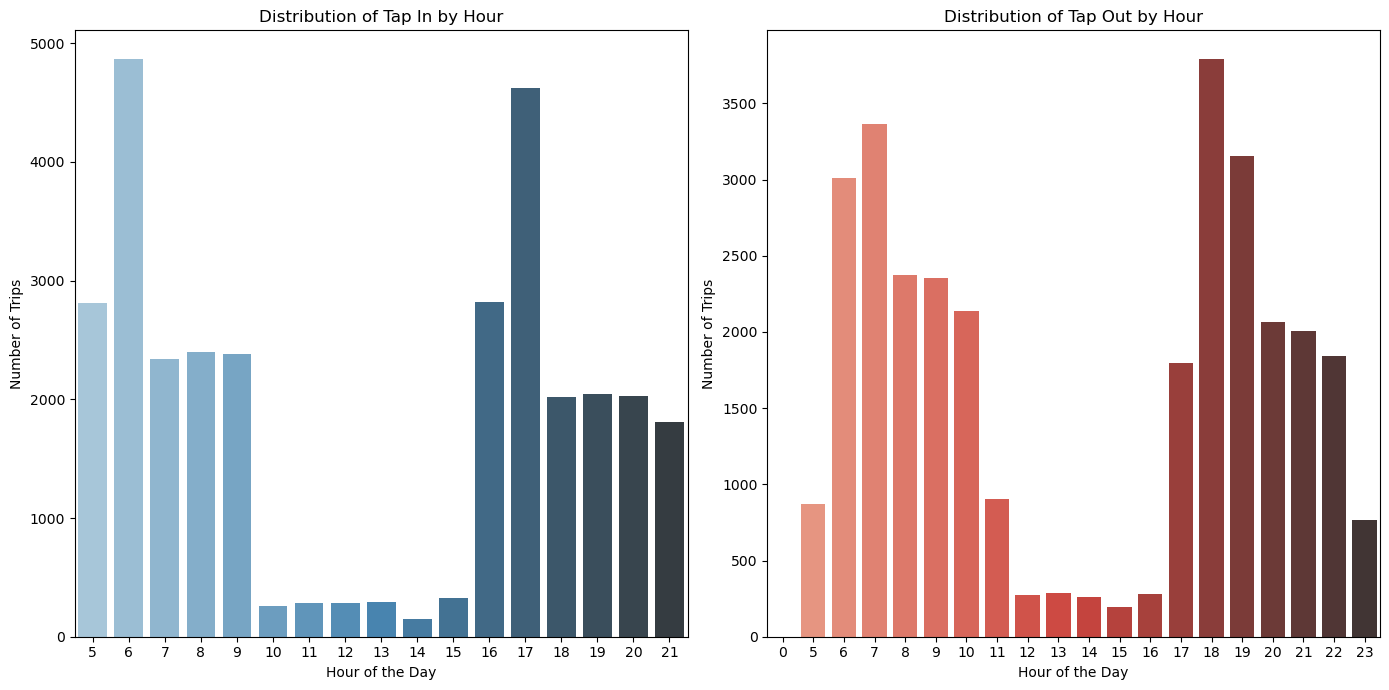

In [33]:
# Plot the distribution of trips by hour for tap in and tap out times
plt.figure(figsize=(14, 7))

# Plot for Tap In
plt.subplot(1, 2, 1)
sns.barplot(x=tap_in_hourly_distribution.index, y=tap_in_hourly_distribution.values, palette='Blues_d')
plt.title('Distribution of Tap In by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

# Plot for Tap Out
plt.subplot(1, 2, 2)
sns.barplot(x=tap_out_hourly_distribution.index, y=tap_out_hourly_distribution.values, palette='Reds_d')
plt.title('Distribution of Tap Out by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()

In [34]:
df_cleaned.to_excel('transjakarta_cleaned.xlsx')

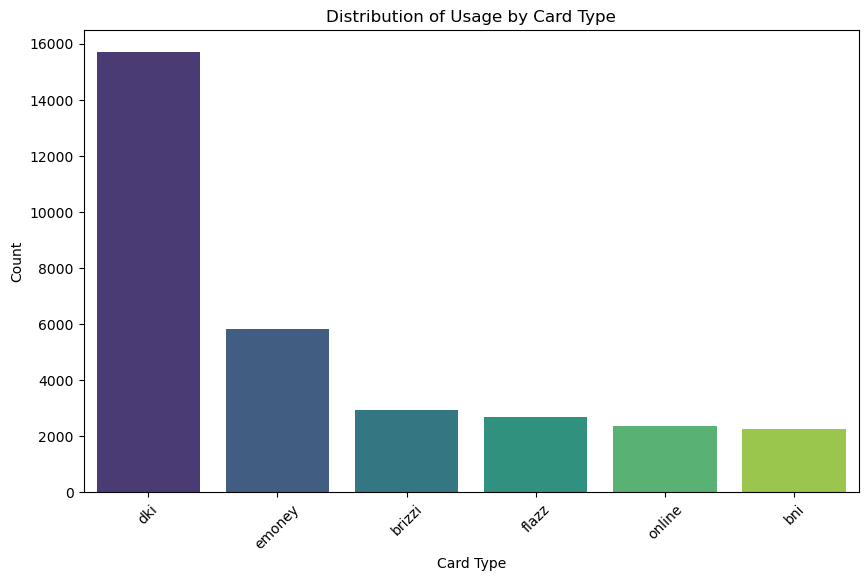

In [35]:
# Plot distribution of usage by card type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='payCardBank', order= df_cleaned['payCardBank'].value_counts().index, palette='viridis')
plt.title('Distribution of Usage by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Jumlah nilai NaN dalam kolom 'tripDuration': 0


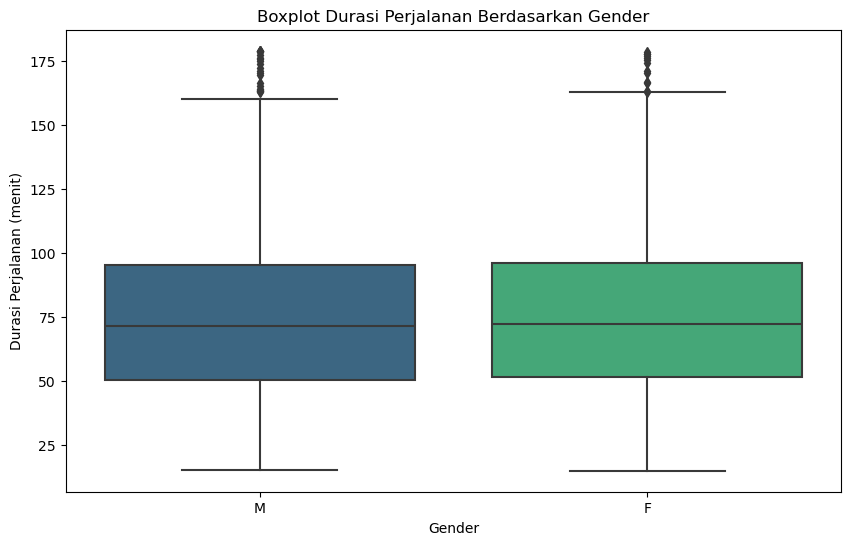

Variansi durasi perjalanan berdasarkan gender:
Perempuan: 779.3783183640752
Laki-laki: 797.5854177488534

t-statistic: 2.436780206309022, p-value: 0.014824142462892386

Perbedaan durasi perjalanan antara laki-laki dan perempuan signifikan secara statistik.


In [36]:
# Check for NaN values in tripDuration
print("Jumlah nilai NaN dalam kolom 'tripDuration':", df_cleaned['tripDuration'].isna().sum())

# Drop rows with NaN values in tripDuration
df_cleaned = df_cleaned.dropna(subset=['tripDuration'])

# Plot boxplot for trip duration by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='payCardSex', y='tripDuration', palette='viridis')
plt.title('Boxplot Durasi Perjalanan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Durasi Perjalanan (menit)')
plt.show()

# Separate trip duration by gender
trip_duration_female = df_cleaned[df_cleaned['payCardSex'] == 'F']['tripDuration']
trip_duration_male = df_cleaned[df_cleaned['payCardSex'] == 'M']['tripDuration']

# Check variance
print("Variansi durasi perjalanan berdasarkan gender:")
print("Perempuan:", trip_duration_female.var())
print("Laki-laki:", trip_duration_male.var())

# Perform t-test
t_stat, p_value = ttest_ind(trip_duration_female, trip_duration_male)
print(f"\nt-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("\nPerbedaan durasi perjalanan antara laki-laki dan perempuan signifikan secara statistik.")
else:
    print("\nPerbedaan durasi perjalanan antara laki-laki dan perempuan tidak signifikan secara statistik.")

Jumlah nilai NaN dalam kolom 'tripDuration': 0


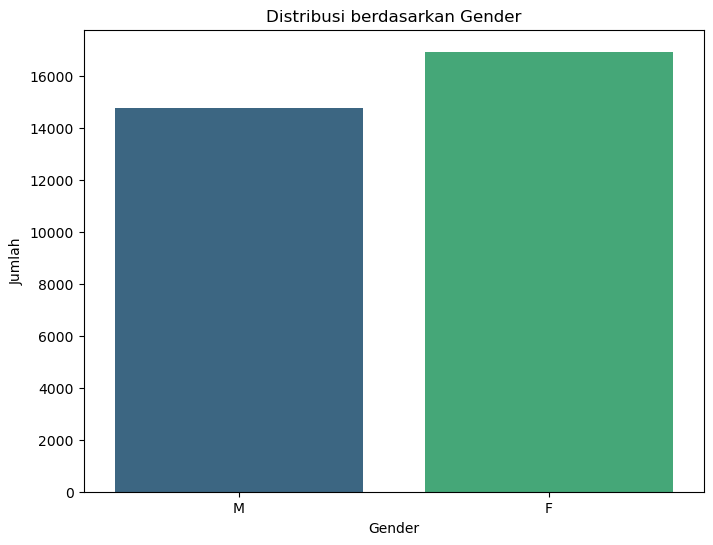

Rata-rata durasi perjalanan berdasarkan jenis kelamin:
payCardSex
F    72.556177
M    71.786453
Name: tripDuration, dtype: float64

t-statistic: 2.436780206309022, p-value: 0.014824142462892386

Perbedaan durasi perjalanan antara laki-laki dan perempuan signifikan secara statistik.


In [37]:
# Check for NaN values in tripDuration
print("Jumlah nilai NaN dalam kolom 'tripDuration':", df_cleaned['tripDuration'].isna().sum())

# Drop rows with NaN values in tripDuration
df_cleaned = df_cleaned.dropna(subset=['tripDuration'])

# Check the distribution of gender
gender_distribution = df_cleaned['payCardSex'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='payCardSex', palette='viridis')
plt.title('Distribusi berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

# Calculate mean trip duration by gender
mean_trip_duration_by_gender = df_cleaned.groupby('payCardSex')['tripDuration'].mean()
print("Rata-rata durasi perjalanan berdasarkan jenis kelamin:")
print(mean_trip_duration_by_gender)

# Separate trip duration by gender
trip_duration_female = df_cleaned[df_cleaned['payCardSex'] == 'F']['tripDuration']
trip_duration_male = df_cleaned[df_cleaned['payCardSex'] == 'M']['tripDuration']

# Perform t-test
t_stat, p_value = ttest_ind(trip_duration_female, trip_duration_male)
print(f"\nt-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("\nPerbedaan durasi perjalanan antara laki-laki dan perempuan signifikan secara statistik.")
else:
    print("\nPerbedaan durasi perjalanan antara laki-laki dan perempuan tidak signifikan secara statistik.")

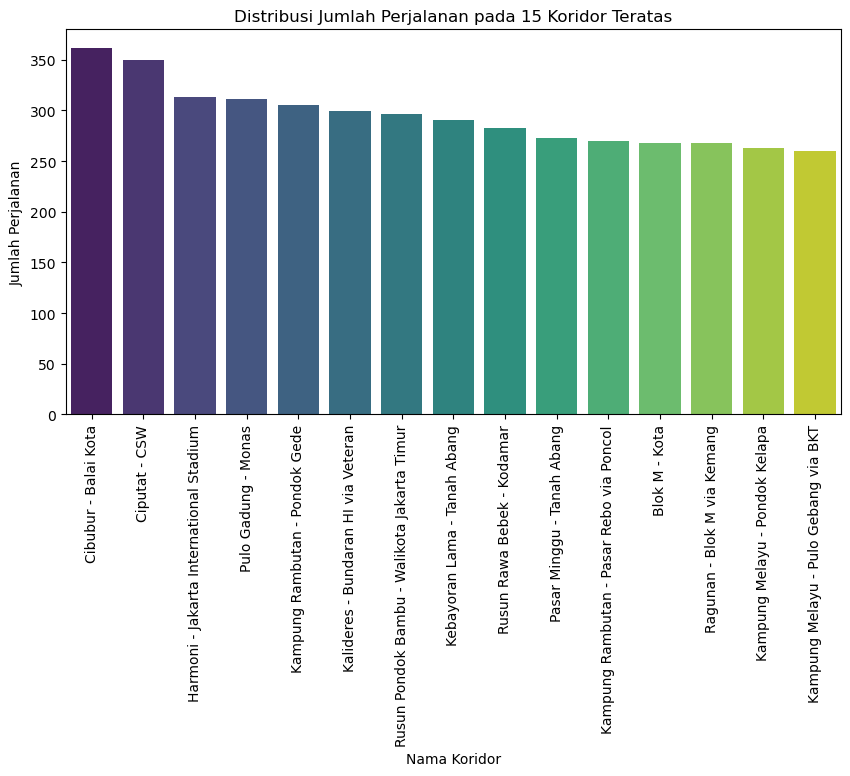

In [38]:
# mendapatkan 15 coridor teratas berdasarkan jumlah perjalanan
top_15_corridors = df_cleaned['corridorName'].value_counts().nlargest(15).index

# dataframe 15 coridor
df_top_15 = df_cleaned[df_cleaned['corridorName'].isin(top_15_corridors)]

# Plot 
plt.figure(figsize=(10, 5))
sns.countplot(data=df_top_15, x='corridorName', palette='viridis', order=df_top_15['corridorName'].value_counts().index)
plt.title('Distribusi Jumlah Perjalanan pada 15 Koridor Teratas')
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=90)
plt.show()

**KESIMPULAN**

1. Distribusi Gender:
Data menunjukkan distribusi pengguna Transjakarta berdasarkan jenis kelamin cukup seimbang.

2. Durasi Perjalanan Rata-rata:
Rata-rata durasi perjalanan untuk pengguna perempuan (F) adalah sekitar 72.56 menit.
Rata-rata durasi perjalanan untuk pengguna laki-laki (M) adalah sekitar 71.79 menit.

**Uji Statistik:**

Hasil uji t menunjukkan nilai t-statistic sekitar 2.44 dan p-value sekitar 0.0148 sebelum membersihkan outliers, yang menunjukkan bahwa perbedaan durasi perjalanan antara laki-laki dan perempuan signifikan secara statistik (p-value < 0.05).
Setelah membersihkan outliers, jika hasil tetap signifikan, hal ini memperkuat kesimpulan bahwa terdapat perbedaan nyata dalam durasi perjalanan antara laki-laki dan perempuan.

**Rekomendasi**

1. Peningkatan Layanan:

Mengingat ada perbedaan signifikan dalam durasi perjalanan, Transjakarta dapat mengevaluasi apakah ada kebutuhan khusus atau hambatan yang berbeda untuk pengguna perempuan dan laki-laki, dan bagaimana layanan dapat ditingkatkan untuk mengurangi perbedaan ini.
Penyediaan Informasi:

Memberikan informasi yang lebih akurat dan real-time mengenai durasi perjalanan di berbagai koridor bisa membantu pengguna merencanakan perjalanan mereka dengan lebih baik.

2. Fasilitas Khusus:

Mengingat perempuan mungkin mengalami durasi perjalanan yang lebih lama, Transjakarta dapat mempertimbangkan fasilitas khusus untuk perempuan seperti gerbong atau kursi khusus pada waktu-waktu tertentu untuk meningkatkan kenyamanan.

Studi Lebih Lanjut:

Melakukan studi lebih lanjut untuk mengidentifikasi faktor-faktor lain yang mempengaruhi durasi perjalanan, seperti waktu perjalanan (jam sibuk vs. non-sibuk), koridor yang digunakan, dan faktor-faktor eksternal lainnya.
